# Example Anduryl with scripting

This notebook shows the possibilities for using the Anduryl module without the user interface. An overview of the main functionalities is given, as well as some examples how the underlying data can be accessed. The goal is to provide some handles for doing your own analyses or create your own plots from scripting.

A project can also be build (adding experts, items and assessments) from script, but this is easier from the GUI. Therefor this is not elaborated in this notebook.

### Import Python modules

In [1]:
import sys
sys.path.append('../..')
import anduryl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


### Load project

In [2]:
# Create project and load Excalibur files
file = 'tobacco'
project = anduryl.Project()
project.io.load_excalibur(f'../data/{file}.dtt', f'../data/{file}.rls')
project

Main project class.
Properties:
 - assessments
 - experts
 - io
 - items
 - main_results
 - results
Methods:
 - add_results_from_settings
 - calculate_decision_maker
 - calculate_expert_robustness
 - calculate_item_robustness
 - initialize
 - to_results

### Items

The items are organized in the Items-class `project.items`. The main properties are present in the variables `project.items.ids`, `project.items.scale`, `project.items.realizations` and `project.items.questions`. An overview can be generated in the form of a Python dictionary with the method `project.items.from_dict()`. This dictionary can easily be converted to a pandas DataFrame:

In [3]:
pd.DataFrame.from_dict(project.items.as_dict())

,Scale,Realization,Question
$TAdProm2005,uni,13.110,amount (billion $) spent on advertising and pr...
%discount,uni,77.300,% of advertising and promotional activities on...
MinVio,uni,7.000,violation rate for sales of tobacco to minors ...
%DropPost2002,uni,74.280,% of 35% drop in cigarette pack sales over 199...
%LowIncSmoke,uni,34.000,"% of people with household income <$15,000 smo..."
%SmokePA/NJ,uni,1.260,ratio % adults smoke daily in PA/NJ
CancMortPA/USA,uni,1.200,ratio lung cancer mortality in PA/USA
%NoInsPA/USA,uni,0.777,ratio % without health insurance PA/USA
SmokIns/NoIns,uni,1.830,ratio cigarette smoking among people with no h...
08%CDCmin,uni,21.300,PA state tobacco control funding as % of CDC m...


### Experts

The experts are organized in a similar way (`project.experts`). The main properties are present in the variables `project.experts.ids`, `project.experts.names`, `project.experts.info_total`, `project.experts.info_real`, `project.experts.calibration`, `project.experts.weights` and `project.experts.user_weights`. Most of these variables are filled in when adding experts or calculating decision makers. The only user defined variable is `project.experts.user_weights`. Since we haven't calculated a decision maker yet, the information and calibration scores are still empty:

In [4]:
pd.DataFrame.from_dict(project.experts.as_dict())

,Name,Info. score total,Info. score real.,Calibration score,Weight,User weight
Ex1,Ex1,NaN,NaN,NaN,NaN,NaN
Ex2,Ex2,NaN,NaN,NaN,NaN,NaN
Ex3,Ex3,NaN,NaN,NaN,NaN,NaN
Ex4,Ex4,NaN,NaN,NaN,NaN,NaN
Ex5,Ex5,NaN,NaN,NaN,NaN,NaN
Ex6,Ex6,NaN,NaN,NaN,NaN,NaN
Ex7,Ex7,NaN,NaN,NaN,NaN,NaN


### Assessments

The assessments are organized in the Assessments-class `project.assessments`. The main  variables are `project.assessments.quantiles` and `project.assessments.array`, which contains all the assessment values in a 3D array (Nexperts, Nquantiles, Nitems). With the method `project.assessments.from_dict()` a table overview can be generated in the form of a Python dictionary. Again, this can easily be converted to a pandas DataFrame.

In [5]:
pd.DataFrame.from_dict(project.assessments.as_dict()).head(25)

0.05   0.25   0.50  0.75    0.95
Ex1 $TAdProm2005     5.0  12.00  25.00  35.0   50.00
    %discount        2.0   7.00  10.00  11.0   12.00
    MinVio           5.0   8.00  10.00  15.0   20.00
    %DropPost2002   10.0  25.00  40.00  50.0   60.00
    %LowIncSmoke    20.0  35.00  50.00  60.0   75.00
    %SmokePA/NJ      1.0   1.10   1.25   1.4    1.80
    CancMortPA/USA   1.0   1.20   1.30   1.4    1.50
    %NoInsPA/USA     0.5   0.75   1.00   1.1    1.25
    SmokIns/NoIns    0.8   1.00   1.50   1.6    1.80
    08%CDCmin       40.0  45.00  55.00  60.0   65.00
    08%CDCminwoRWJ  25.0  30.00  35.00  40.0   50.00
    20%CDCmin       45.0  50.00  60.00  65.0   70.00
    20%CDCminwoRWJ  10.0  20.00  30.00  40.0   50.00
    08AdCig         18.0  19.00  22.00  23.0   25.00
    08AdCigwoRWJF   25.0  28.00  33.00  34.0   36.00
    20AdCig         15.0  18.00  19.00  21.0   23.00
    20AdCigwoRWJF   20.0  23.00  25.00  28.0   30.00
    08YthCig        18.0  25.00  28.00  30.0   35.00
    08YthCigwoRWJF  20.0  29.00  35.00  38.0   40.00
    20YthCig        18.0  20.00  22.00  25.0   28.00
    20YthCigwoRWJF  25.0  28.00  32.00  35.0   38.00
Ex2 $TAdProm2005     1.0   5.00  10.00  15.0   25.00
    %discount        5.0  10.00  15.00  20.0   25.00
    MinVio           1.0   3.00   5.00   7.0   10.00
    %DropPost2002   50.0  60.00  85.00  90.0  100.00

### Calculate desision maker(s)

We calculate two decision makers:
- Global weights with optimisation of the calibration threshold value (significance level).
- User defined weights. Note that we have to define these first

The decision maker van be calculated with the method `project.calculate_decision_maker([args])`.

In [6]:
# Note that not specifying alpha results in optimization in case of global or item weights.
project.calculate_decision_maker(
    weight_type='global',
    overshoot=0.1,
    exp_id='GL opt',
    calpower=1.0,
    exp_name='Global with optimisation',
    alpha=None,
    overwrite=True
)

# Define user weights, by specifing the weights for each of the first 4 experts
project.experts.user_weights[0:7] = [1.5, 0.2, 0.3, 0.4, 0.3, 0.4, 0.5]

# Calculate decision maker with user defined weights
project.calculate_decision_maker(
    weight_type='user',
    overshoot=0.1,
    exp_id='US',
    calpower=1.0,
    exp_name='User defined weights',
    alpha=None,
    overwrite=True
)

If we visualize the experts now, we see that information and calibration scores are filled in. Note that these may vary with the chosen calculated settings.

In [7]:
pd.DataFrame.from_dict(project.experts.as_dict())

,Name,Info. score total,Info. score real.,Calibration score,Weight,User weight
Ex1,Ex1,0.821255,0.929125,0.036982,0.034361,1.5
Ex2,Ex2,0.705990,1.002679,0.171575,0.172035,0.2
Ex3,Ex3,0.669885,0.996867,0.001053,0.001050,0.3
Ex4,Ex4,0.697621,0.818449,0.023658,0.019363,0.4
Ex5,Ex5,1.165807,0.896439,0.439946,0.394384,0.3
Ex6,Ex6,1.078725,1.468409,0.077960,0.114477,0.4
Ex7,Ex7,0.943491,1.062177,0.687587,0.730339,0.5
GL opt,Global with optimisation,0.943491,1.062177,0.687587,0.730339,NaN
US,User defined weights,0.329472,0.459663,0.459729,0.211320,NaN


In the next figure we plot the CDF of the experts and the decision makers:

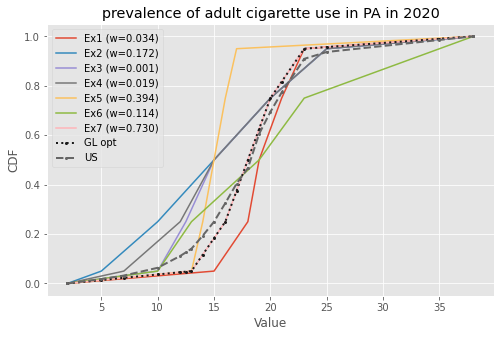

In [8]:
item = '20AdCig'
itemnr = project.items.ids.index(item)

# Get experts assessments for the item
itemassessment = project.assessments.get_array(experts='actual')[:, :, itemnr]
# Get bounds for the item
bounds = project.assessments.get_bounds(overshoot=0.1)
lower, upper = bounds[0][itemnr], bounds[1][itemnr]

# Plot experts cdf's
fig, ax = plt.subplots(figsize=(8, 5))
for i, assessment in enumerate(itemassessment):
    ax.plot(np.r_[lower, assessment, upper], np.r_[0.0, project.assessments.quantiles, 1.0],
            label='{} (w={:.3f})'.format(project.experts.ids[i], project.experts.weights[i]))
    
# Plot decision makers cdf's
ax.plot(*project.assessments.full_cdf['GL opt'][itemnr].T, label='GL opt', marker='.', ms=4, color='0.1', ls=':', lw=2)
ax.plot(*project.assessments.full_cdf['US'][itemnr].T, label='US', marker='.', ms=4, color='0.4', ls='--', lw=2)

ax.legend()

ax.set_title(project.items.questions[itemnr])
ax.set_xlabel('Value')
ax.set_ylabel('CDF');

Note that the global optimal decision maker is equal to Ex7. This last expert has the highest calibration score, apparently so high that the results with the highest weight is reached when all weight is assigned to this expert.

### Robustness

A way of checking the robustness of the project is by removing one or multiple items or experts from the project in turn, and checking the resulting information and calibration scores. If these values will change a lot, it shows that the number of items or experts might be a bit too low.

Both the item and expert robustness can be calculated with the method `project.calculate_item_robustness([args])` and `project.calculate_expert_robustness([args])`.

In [9]:
project.calculate_item_robustness(
    weight_type='item',
    overshoot=0.1,
    max_exclude=1,
    min_exclude=0,
    calpower=1.0,
    alpha=0.0
)

The results for excluding a single item in turn are shown in the table below:

In [10]:
robres = project.main_results.item_robustness
index = [val[0] if val else 'None' for val in list(robres.keys())]
pd.DataFrame(data=robres.values(), index=index, columns=['Info score total' ,'Info score realizations', 'Calibration score'])

,Info score total,Info score realizations,Calibration score
None,0.668081,0.790444,0.498798
$TAdProm2005,0.600844,0.602206,0.801712
%discount,0.590905,0.759964,0.156436
MinVio,0.622340,0.808927,0.447826
%DropPost2002,0.649231,0.812677,0.801712
%LowIncSmoke,0.680481,0.758015,0.801712
%SmokePA/NJ,0.630291,0.784307,0.624339
CancMortPA/USA,0.612523,0.787210,0.447826
%NoInsPA/USA,0.740232,0.878367,0.315327
SmokIns/NoIns,0.624910,0.811371,0.233313


We can also exclude multiple items, and shows the sensitivity of the project for that. Note that the number of combinations blows up quickly when excluding multiple items, so the calculation time does too.

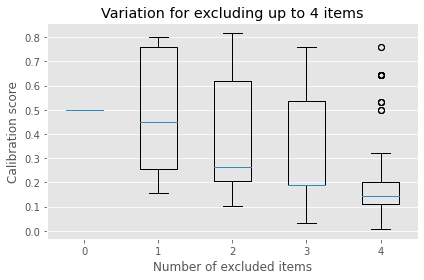

In [11]:
# Exclude up to four items
project.calculate_item_robustness(
    weight_type='item',
    overshoot=0.1,
    max_exclude=4,
    min_exclude=0,
    calpower=1.0,
    alpha=0.0
)

# Collect the results (calibration score) per number of excluded items
robres = project.main_results.item_robustness
values = {}
for key, value in robres.items():
    # Add dictionary item if it does not exist yet
    if len(key) not in values.keys():
        values[len(key)] = []
    # Append calibration score (the 3th value, index 2 since Python is zero-based)
    values[len(key)].append(value[2])
        
# Show the variation in calibration and information scores.
fig, ax = plt.subplots()
ax.boxplot(values.values(), positions=list(values.keys()));
ax.set_xlabel('Number of excluded items')
ax.set_ylabel('Calibration score')
ax.set_title('Variation for excluding up to 4 items');
ax.grid(axis='x')
fig.tight_layout()

Note that excluding one or more items results in a large variation of the calibration score. Especially for 2 or more items, the median calibration score becomes much lower.